In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

In [2]:
path_eventos = 'events.csv.gzip'

events = pd.read_csv(path_eventos, compression='gzip', dtype={'date': 'object', 'event_id': 'Int64',\
                                                              'ref_type': 'Int64', 'ref_hash': 'Int64',\
                                                             'application_id': 'Int64', 'attributed': 'bool',\
                                                             'device_countrycode': 'Int64', 'device_os_version': 'Float64',\
                                                             'device_brand': 'Float64', 'device_model': 'Float64', 'device_city': 'Float64',\
                                                             'session_user_agent': 'Float64', 'trans_id': 'object', 'user_agent': 'Float64',\
                                                             'event_uuid': 'object', 'carrier': 'Float64', 'kind': 'Float64', 'device_os': 'Float64',\
                                                             'wifi': 'object', 'connection_type': 'object', 'ip_address': 'Int64', 'device_language': 'Float64'})

# Analisis Previo Events

In [3]:
events.shape

(2494423, 22)

Hay 22 columnas y 2494423 registros

In [4]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494423 entries, 0 to 2494422
Data columns (total 22 columns):
date                  object
event_id              int64
ref_type              int64
ref_hash              int64
application_id        int64
attributed            bool
device_countrycode    int64
device_os_version     float64
device_brand          float64
device_model          float64
device_city           float64
session_user_agent    float64
trans_id              object
user_agent            float64
event_uuid            object
carrier               float64
kind                  float64
device_os             float64
wifi                  object
connection_type       object
ip_address            int64
device_language       float64
dtypes: bool(1), float64(10), int64(6), object(5)
memory usage: 402.0+ MB


In [5]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [6]:
events.describe()

,event_id,ref_type,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,ip_address,device_language
count,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,2.494423e+06,1.022066e+06,1.164963e+06,2.406456e+06,6.146980e+05,2.482637e+06,1.391527e+06,6.164340e+05,2.489324e+06,6.576670e+05,2.494423e+06,2.406604e+06
mean,9.970445e+01,1.794164e+18,4.641486e+18,9.910934e+01,6.333597e+18,4.986001e+18,1.633891e+18,4.478847e+18,3.832628e+18,4.719312e+18,4.856492e+18,1.470186e+18,5.364362e+18,7.251101e+18,4.620786e+18,5.865447e+18
std,1.070903e+02,1.707944e+17,2.660724e+18,5.780986e+01,1.778596e+08,2.394834e+18,1.626674e+18,2.718014e+18,8.166911e+17,1.769561e+18,2.487552e+18,2.575962e+18,2.242979e+18,5.247066e+17,2.672746e+18,2.281192e+18
min,0.000000e+00,1.494519e+18,1.633675e+14,0.000000e+00,6.333597e+18,1.004084e+16,7.949737e+16,9.530216e+14,4.355428e+16,5.527631e+15,5.072532e+15,2.248157e+17,7.758270e+16,2.748831e+18,5.287755e+12,2.025809e+16
25%,2.200000e+01,1.891515e+18,2.326142e+18,6.300000e+01,6.333597e+18,4.353750e+18,3.083059e+17,2.331947e+18,3.800080e+18,3.819516e+18,2.723465e+18,2.248157e+17,4.647949e+18,6.941825e+18,2.333410e+18,3.301378e+18
50%,3.100000e+01,1.891515e+18,4.688964e+18,6.600000e+01,6.333597e+18,4.353750e+18,5.137992e+17,4.430579e+18,3.800080e+18,3.819516e+18,5.022936e+18,2.248157e+17,5.500848e+18,7.531669e+18,4.541498e+18,6.804428e+18
75%,1.610000e+02,1.891515e+18,6.927594e+18,1.450000e+02,6.333597e+18,7.391844e+18,2.987569e+18,6.882415e+18,3.800080e+18,7.164321e+18,6.840860e+18,1.179587e+18,6.169667e+18,7.531669e+18,7.044307e+18,6.977049e+18
max,7.120000e+02,1.891515e+18,9.223316e+18,3.220000e+02,6.333597e+18,9.135482e+18,9.178260e+18,9.222450e+18,9.205669e+18,9.220949e+18,9.223277e+18,9.182957e+18,9.215473e+18,7.531669e+18,9.223367e+18,9.187882e+18


In [7]:
# Damos formato a la fecha.
events['timestamp_format'] = pd.to_datetime(events['date'])

# Agrego columna fecha
events['date'] = events['timestamp_format'].dt.date
# Agrego columna de mes.
events['month'] = events['timestamp_format'].dt.month
# Agrego columna nombre dia.
events['weekday_name'] = events['timestamp_format'].dt.weekday_name
# Agrego columna numero dia.
events['day'] = events['timestamp_format'].dt.day
# Agrego columna de horas
events['hour'] = events['timestamp_format'].dt.hour

# Id Evento como categoria
events['event_category'] = events['event_id'].astype('category')

# Analisis Temporal

Antes de comenzar con el analisis, es necesario saber en cual rango de fechas estamos trabajando.

In [8]:
# fecha minima
events['timestamp_format'].min()

Timestamp('2019-03-05 00:00:00.255000')

In [9]:
# fecha maxima
events['timestamp_format'].max()

Timestamp('2019-03-13 23:59:59.984000')

Los primeros datos son del 5 de marzo de 2019 y el ultimo del 13 de marzo de 2019 (ambos dias limites estan incluidos en el rango de datos validos ya que parece haber data del dia completo)

# ¿Cuantos eventos se registraron por dia?

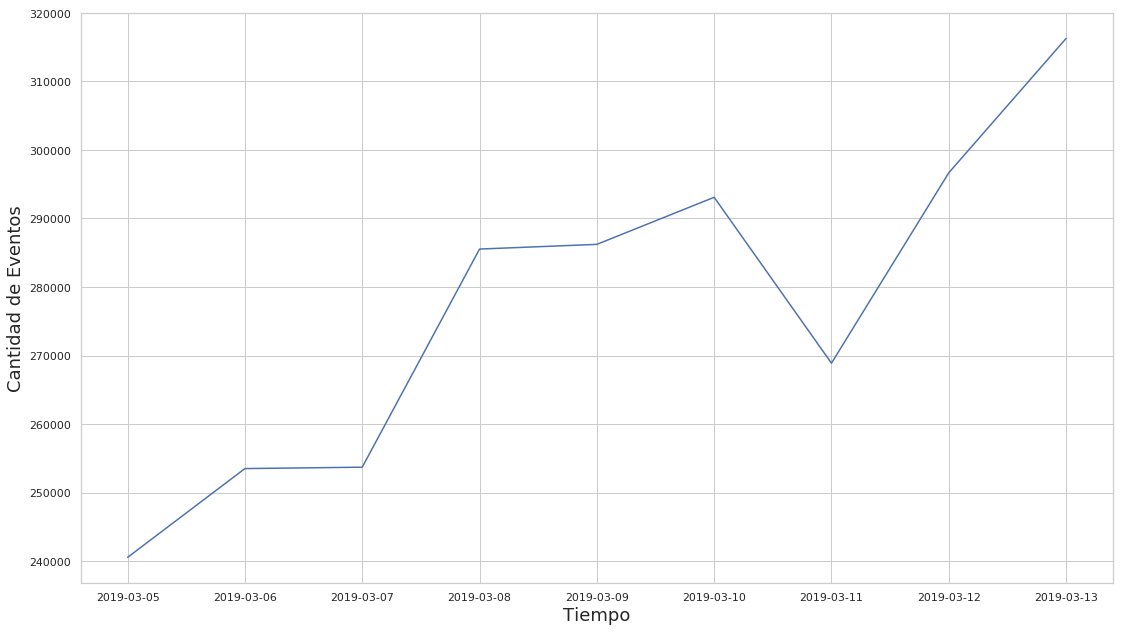

In [10]:
eventos_totales = events.groupby('date')['event_category'].count()
g = eventos_totales.plot()
g.set_xlabel("Tiempo", fontsize=18)
g.set_ylabel("Cantidad de Eventos", fontsize=18)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/cant_eventos_tiempo.png')

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


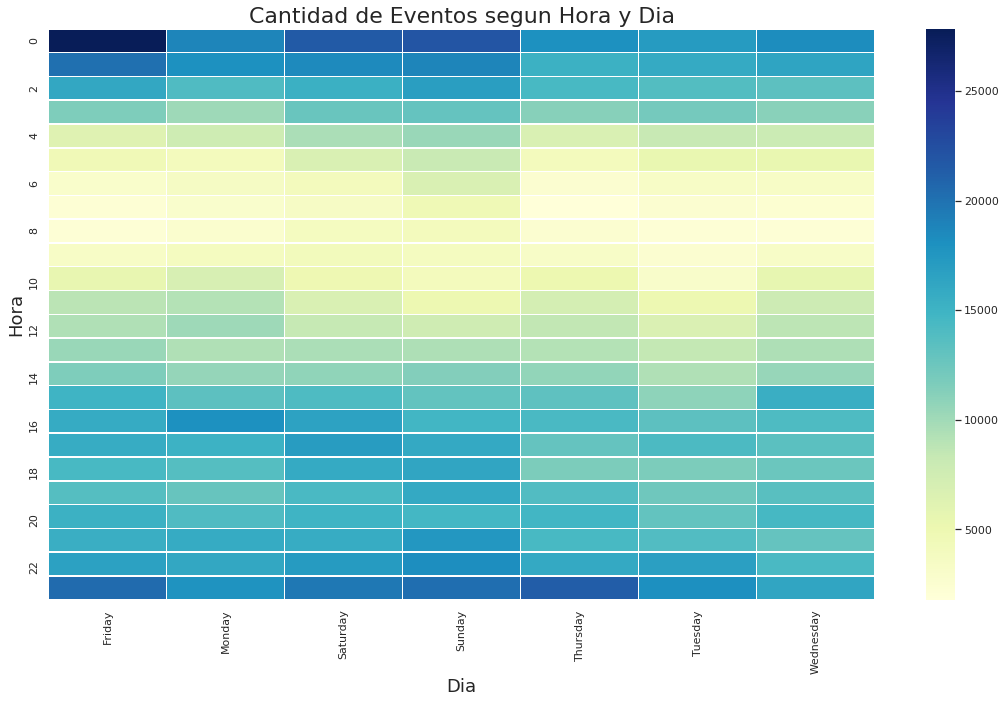

In [11]:
### Cantidad de eventos por combinacion de hora en el dia.
# Filtro los dias 12 y 13 para que justo haya 1 semana de data
data_semanal = events.loc[events['day'] < 12,:]
data_semanal['event_contador'] = 1
for_heatmap_hr_day = data_semanal.pivot_table(index='hour', columns='weekday_name', values='event_contador', aggfunc='sum')

g = sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=False porque muestra numeros exponenciales
g.set_title("Cantidad de Eventos segun Hora y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/eventos_hr_dia.png')

Los eventos parecen estar distribuidos de manera uniforme en los distintos dias. En cuanto a la distribucion horaria, el rango de horarios con menor cantidad de eventos es de 4am a 9am. El de mayor cantidad de eventos es desde las 10pm hasta las 2am del siguiente dia.

# Analisis general

# ¿Cuales son las aplicaciones que registran la mayor cantidad de eventos?

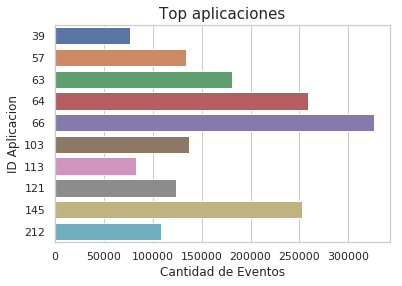

In [12]:
top_aplicaciones = events.groupby('application_id')['event_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=top_aplicaciones.values, y=top_aplicaciones.index, orient='h')
g.set_title("Top aplicaciones", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("ID Aplicacion", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_aplicaciones.png')

Las aplicaciones 66, 64 y 145 son las que registran mayor cantidad de eventos en ese orden.

# Cuales son los users que generan mas eventos?

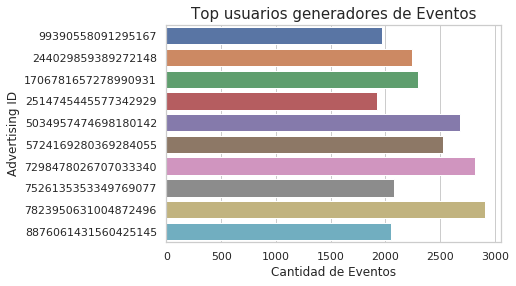

In [13]:
top_users = events.groupby('ref_hash')['event_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=top_users.values, y=top_users.index, orient='h')
g.set_title("Top usuarios generadores de Eventos", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("Advertising ID", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_users_gen_eve.png')

# Cuales son los eventos mas populares segun su tipo?

In [30]:
top_events_kind = events.groupby('kind', as_index=False)['event_id'].count().sort_values(by='event_id', ascending=False)[:10]
top_events_kind

,kind,event_id
320,5.500848e+18,618217
295,5.104972e+18,300632
573,9.066788e+18,217846
41,9.977660e+17,151445
551,8.820572e+18,110045
271,4.647949e+18,100029
173,3.209078e+18,84898
114,2.376750e+18,56489
453,7.320636e+18,52726
223,4.017674e+18,43936


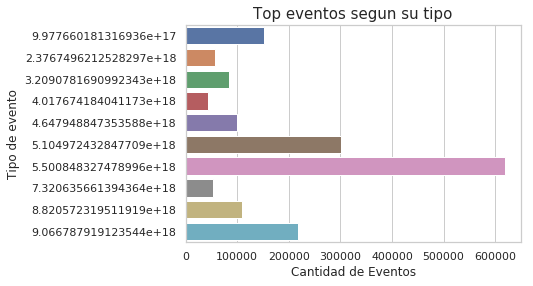

In [32]:
g = sns.barplot(x=top_events_kind['event_id'].values, y=top_events_kind['kind'].values, orient='h')
g.set_title("Top eventos segun su tipo", fontsize=15)
g.set_xlabel("Cantidad de Eventos", fontsize=12)
g.set_ylabel("Tipo de evento", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_events_kind.png')